In [1]:
# 📦 Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# 📂 Load cleaned dataset
df = pd.read_csv('../dataset/fri_dataset_cleaned.csv')

# ✅ Split into features and labels
X = df['text']
y = df['label']

# ✂️ Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔠 Convert text data into TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


## Baseline Model

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the model using TF-IDF features
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predict using TF-IDF test data
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.9857578840284842

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1011
           1       0.99      0.98      0.99       955

    accuracy                           0.99      1966
   macro avg       0.99      0.99      0.99      1966
weighted avg       0.99      0.99      0.99      1966


✅ Confusion Matrix:
 [[1006    5]
 [  23  932]]


In [3]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_tfidf, y_train, cv=5)
print("✅ Cross-validation scores:", scores)
print("✅ Mean accuracy:", scores.mean())

✅ Cross-validation scores: [0.9885569  0.98474253 0.98791349 0.98409669 0.98600509]
✅ Mean accuracy: 0.986262939004091


### WordCloud of Real vs Fake News

In [5]:
import pandas as pd

# Load cleaned dataset
df_cleaned = pd.read_csv('../dataset/fri_dataset_cleaned.csv')


# Quick check
print(df_cleaned.shape)
print(df_cleaned.columns)


(9828, 2)
Index(['text', 'label'], dtype='object')


d:\Projects\TrueLens\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128997 (\N{LARGE RED SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Projects\TrueLens\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129001 (\N{LARGE GREEN SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


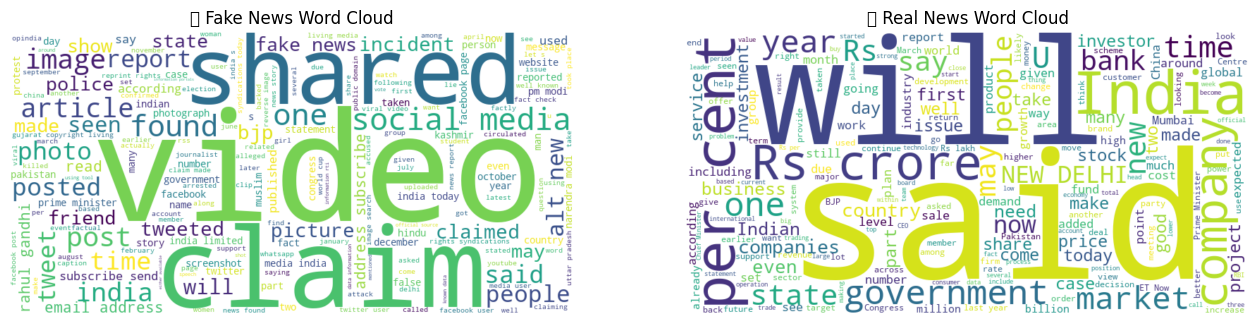

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text for each class
fake_texts = df_cleaned[df_cleaned['label'] == 1]['text'].str.cat(sep=' ')
real_texts = df_cleaned[df_cleaned['label'] == 0]['text'].str.cat(sep=' ')

# Generate word clouds
fake_wc = WordCloud(width=800, height=400, background_color='white').generate(fake_texts)
real_wc = WordCloud(width=800, height=400, background_color='white').generate(real_texts)

# Plot word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(fake_wc, interpolation='bilinear')
plt.title('🟥 Fake News Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(real_wc, interpolation='bilinear')
plt.title('🟩 Real News Word Cloud')
plt.axis('off')

plt.show()


### Confusion Matrix Heatmap

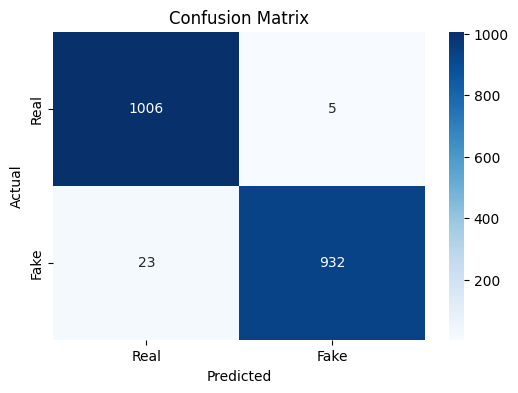

In [8]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_test and y_pred already
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###Top 20 Most Frequent Words (Bar Plot)

C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_38604\1174065051.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


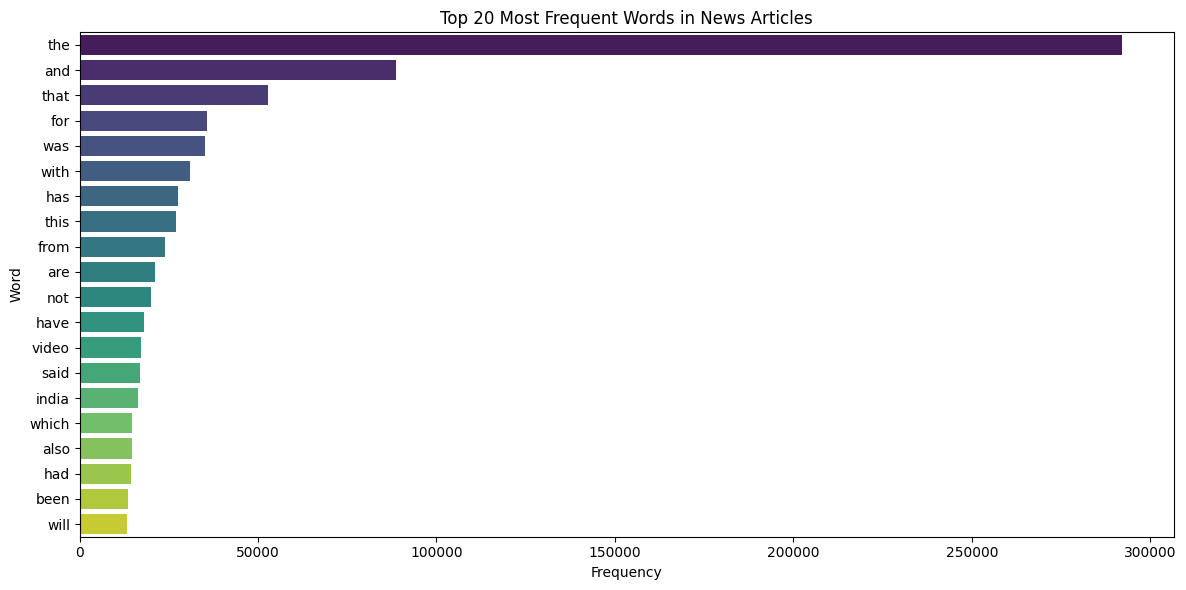

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the cleaned dataset
df_cleaned = pd.read_csv('../dataset/fri_dataset_cleaned.csv')

# Combine all text into one big string
all_text = ' '.join(df_cleaned['text'].astype(str).tolist())

# Tokenize and clean
tokens = re.findall(r'\b[a-zA-Z]{3,}\b', all_text.lower())  # words with 3+ letters

# Count word frequencies
word_freq = Counter(tokens)

# Get top 20 most common words
top_words = word_freq.most_common(20)
words, counts = zip(*top_words)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.title("Top 20 Most Frequent Words in News Articles")
plt.tight_layout()
plt.show()

In [19]:
import os
import joblib

# Navigate up one directory from notebooks
model_dir = os.path.join("..", "model_api", "model")
os.makedirs(model_dir, exist_ok=True)

# Save the files
joblib.dump(model, os.path.join(model_dir, "model.pkl"))
joblib.dump(tfidf_vectorizer, os.path.join(model_dir, "tfidf_vectorizer.pkl"))

print("✅ Model and vectorizer saved to model_api/model/")

✅ Model and vectorizer saved to model_api/model/
